In [1]:
#langkah pertama adalah memasukkan library yang akan dipakai
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"


In [2]:
#lalu kita mengimport dataset, kali ini saya meminjam dataset dari DQLab Academy
pelanggan <- read.csv("https://academy.dqlab.id/dataset/customer_segments.txt", sep="\t")
head(pelanggan)

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun
,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
1,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
2,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
3,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
4,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
5,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206
6,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541


In [3]:
#lihat sedikit terhadap data kita
str(pelanggan)

'data.frame':	50 obs. of  7 variables:
 $ Customer_ID        : Factor w/ 50 levels "CUST-001","CUST-002",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Nama.Pelanggan     : Factor w/ 48 levels "Adeline Huang",..: 7 44 3 5 23 41 9 13 17 33 ...
 $ Jenis.Kelamin      : Factor w/ 2 levels "Pria","Wanita": 1 2 1 1 2 2 1 1 2 1 ...
 $ Umur               : int  58 14 48 53 41 24 64 52 29 33 ...
 $ Profesi            : Factor w/ 5 levels "Ibu Rumah Tangga",..: 5 3 4 4 5 4 5 4 4 4 ...
 $ Tipe.Residen       : Factor w/ 2 levels "Cluster","Sector": 2 1 1 1 1 1 2 1 2 1 ...
 $ NilaiBelanjaSetahun: int  9497927 2722700 5286429 5204498 10615206 5215541 9837260 5223569 5993218 5257448 ...


In [4]:
#terlihat beberapa data yang nantinya akan sering kita pakai, masukkan kedalam variable 
field_yang_digunakan <- c("Jenis.Kelamin","Tipe.Residen","Profesi")
head(pelanggan[field_yang_digunakan])

,Jenis.Kelamin,Tipe.Residen,Profesi
,<fct>,<fct>,<fct>
1,Pria,Sector,Wiraswasta
2,Wanita,Cluster,Pelajar
3,Pria,Cluster,Professional
4,Pria,Cluster,Professional
5,Wanita,Cluster,Wiraswasta
6,Wanita,Cluster,Professional


In [5]:
#data tersebut adalah data bertipe string yang tidak akan bisa dibaca oleh algoritma, ubah menjadi integer
pelanggan_matrix <- data.matrix(pelanggan[field_yang_digunakan])

In [6]:
#gabungkan data matrix terhadap data asli
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
head(pelanggan)

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Tipe.Residen.1,Profesi.1
,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1,2,5
2,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2,1,3
3,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,1,1,4
4,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,1,1,4
5,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,2,1,5
6,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,2,1,4


In [7]:
#cari tahu berapa saja nilai yang sudah di konvert ke matrix, lalu masukkan kedalam variable
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Tipe.Residen <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])

In [8]:
Profesi
Tipe.Residen
Jenis.Kelamin

,Profesi,Profesi.1
,<fct>,<int>
1,Wiraswasta,5
2,Pelajar,3
3,Professional,4
17,Ibu Rumah Tangga,1
31,Mahasiswa,2


,Tipe.Residen,Tipe.Residen.1
,<fct>,<int>
1,Sector,2
2,Cluster,1


,Jenis.Kelamin,Jenis.Kelamin.1
,<fct>,<int>
1,Pria,1
2,Wanita,2


In [9]:
#Terlihat angka nilai belanja terlalu besar, mari kita normalisasikan
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000

In [10]:
#model sudah siap untuk kita operasikan pada algoritma kmeans
#setel set.seed untuk penyeragaman daftar nilai acak, ini biasa dilakukan pada algoritma kmeans
set.seed(100)

In [11]:
#buat variable untuk field yang akan kita gunakan
field_yang_digunakan <- c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")

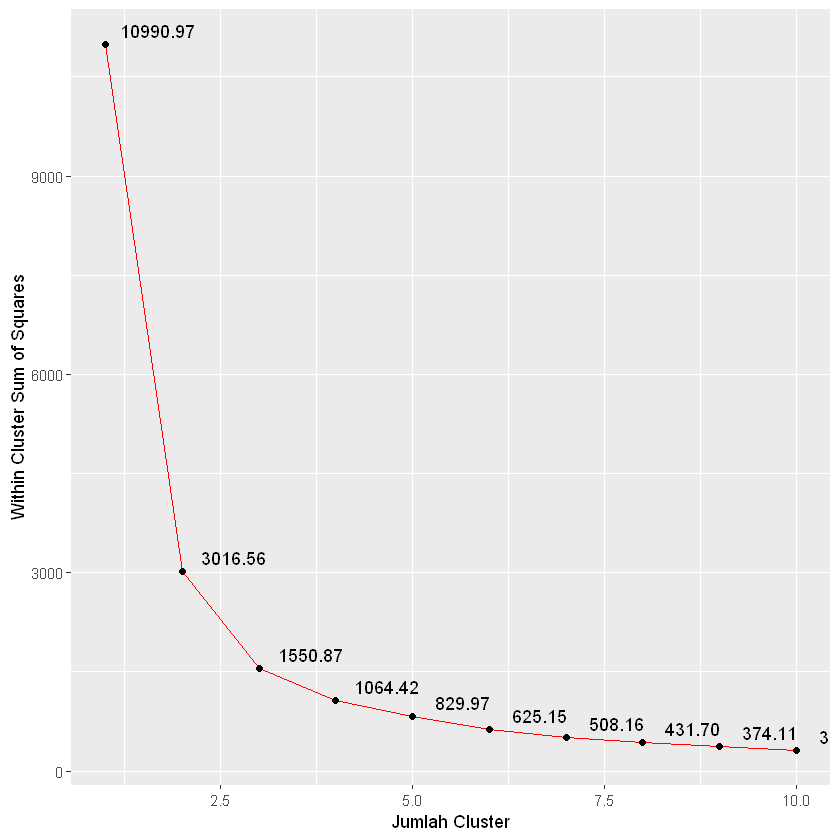

In [12]:
#sebelum kita mengaplikasikan model, kita butuh mencari parameter terbaik
sse <- sapply(1:10, function(param_k){kmeans(pelanggan[field_yang_digunakan], param_k, nstart=25)$tot.withinss})

jumlah_cluster_max <- 10
ssdata <- data.frame(cluster=c(1:jumlah_cluster_max),sse)
ggplot(ssdata, aes(x=cluster,y=sse)) + 
  geom_line(color="red") + geom_point() + 
  ylab("Within Cluster Sum of Squares") + xlab("Jumlah Cluster") +
  geom_text(aes(label=format(round(sse, 2), nsmall = 2)),hjust=-0.2, vjust=-0.5)

#### Terlihat bahwa titik elbow ada di cluster ke 3, maka kita buat jumlah cluster kita menjadi 3

In [13]:
segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=3, nstart=25)
segmentasi

K-means clustering with 3 clusters of sizes 15, 16, 19

Cluster means:
  Jenis.Kelamin.1     Umur Profesi.1 Tipe.Residen.1 NilaiBelanjaSetahun
1        2.000000 20.46667  3.666667       1.333333            6.166391
2        1.812500 34.37500  3.875000       1.250000            7.548875
3        1.684211 53.57895  3.947368       1.473684            7.379783

Clustering vector:
 [1] 3 1 3 3 2 1 3 3 2 2 3 3 3 3 1 2 2 3 2 1 2 3 2 2 2 3 2 2 3 3 1 3 1 1 2 2 1 3
[39] 1 1 1 1 2 1 1 1 3 3 2 3

Within cluster sum of squares by cluster:
[1] 366.3430 359.4961 825.0333
 (between_SS / total_SS =  85.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [14]:
#masukkan hasil cluster ke dalam dataframe
pelanggan$cluster <- segmentasi$cluster

In [15]:
#kita bisa menganalisa data segmentasi dengan memfilter data mana saja yang masuk ke dalam cluster ke-1,2, dst
pelanggan[which(pelanggan$cluster == 2),]

,Customer_ID,Nama.Pelanggan,Jenis.Kelamin,Umur,Profesi,Tipe.Residen,NilaiBelanjaSetahun,Jenis.Kelamin.1,Tipe.Residen.1,Profesi.1,cluster
,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<int>,<int>
5,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10.615206,2,1,5,2
9,CUST-009,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5.993218,2,2,4,2
10,CUST-010,Mario Setiawan,Pria,33,Professional,Cluster,5.257448,1,1,4,2
16,CUST-016,Bambang Rudi,Pria,35,Professional,Cluster,5.262521,1,1,4,2
17,CUST-017,Yuni Sari,Wanita,32,Ibu Rumah Tangga,Cluster,5.677762,2,1,1,2
19,CUST-019,Mega Pranoto,Wanita,32,Wiraswasta,Cluster,10.884508,2,1,5,2
21,CUST-021,Lestari Fabianto,Wanita,38,Wiraswasta,Cluster,9.222070,2,1,5,2
23,CUST-023,Denny Amiruddin,Pria,34,Professional,Cluster,5.239290,1,1,4,2
24,CUST-024,Putri Ginting,Wanita,39,Wiraswasta,Cluster,10.259572,2,1,5,2


In [16]:
#Menghitung banyaknya jumlah customer yang masuk ke dalam cluster(x)
length(which(pelanggan$cluster == 2))

[1] 16

In [17]:
#kita namakan tingkatan cluster kita
Segmen.Pelanggan <- data.frame(cluster=c(1,2,3), Nama.Segmen=c("Gen.Z Woman","Gen.Milenial Professional","Gen.X Professional"))

In [18]:
#setelah selesai, kita gabungan semua referensi ke dalam bentuk list, 
#ini berfungsi jika kita ingin menyimpan file ke dalam bentuk RDS

Identitas.Cluster <- list(Profesi=Profesi, 
                          Jenis.Kelamin=Jenis.Kelamin, 
                          Tipe.Residen=Tipe.Residen, 
                          Segmentasi=segmentasi, 
                          Segmen.Pelanggan=Segmen.Pelanggan, 
                          field_yang_digunakan=field_yang_digunakan)

In [19]:
#model telah selesai belajar mari kita test dengan data baru
databaru <- data.frame(Customer_ID="CUST-100", 
                       Nama.Pelanggan="Raisya Wilamar", 
                       Umur=20,
                       Jenis.Kelamin="Wanita",
                       Profesi="Pelajar",
                       Tipe.Residen="Cluster",
                       NilaiBelanjaSetahun=3.5)

In [20]:
#Masukkan perintah untuk penggabungan data
databaru <- merge(databaru, Identitas.Cluster$Profesi)
databaru <- merge(databaru, Identitas.Cluster$Jenis.Kelamin)
databaru <- merge(databaru, Identitas.Cluster$Tipe.Residen)
databaru

Tipe.Residen,Jenis.Kelamin,Profesi,Customer_ID,Nama.Pelanggan,Umur,NilaiBelanjaSetahun,Profesi.1,Jenis.Kelamin.1,Tipe.Residen.1
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>
Cluster,Wanita,Pelajar,CUST-100,Raisya Wilamar,20,3.5,3,2,1


In [21]:
#menentukan data baru di cluster mana
Identitas.Cluster$Segmen.Pelanggan[which.min(sapply(1:3, function(x) sum((databaru[Identitas.Cluster$field_yang_digunakan] - Identitas.Cluster$Segmentasi$centers[x,])^2))),]

,cluster,Nama.Segmen
,<dbl>,<fct>
1,1,Gen.Z Woman


### Terlihat bahwa data yang baru saja kita masukkan di prediksi oleh model termasuk ke dalam cluster ke 1